In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDb movies.csv')
df.head()

C:\Users\DenT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [82]:
top_movie_by_avgrating = df.groupby('title')[['avg_vote']].mean().sort_values('avg_vote', ascending=False).head(10)

top_movie_by_avgrating.style.bar()

,avg_vote
title,
Suvarna Sundari,9.900000
Lejos de Casa pelicula Venezolana,9.800000
Jeeudo,9.800000
Notuku Potu,9.800000
Ek,9.800000
Vaarthakal Ithuvare,9.700000
Meka Suri,9.700000
Hopeful Notes,9.700000
The Moving on Phase,9.500000


Топ 10 фильмов по версии IMDB

<AxesSubplot:ylabel='country'>

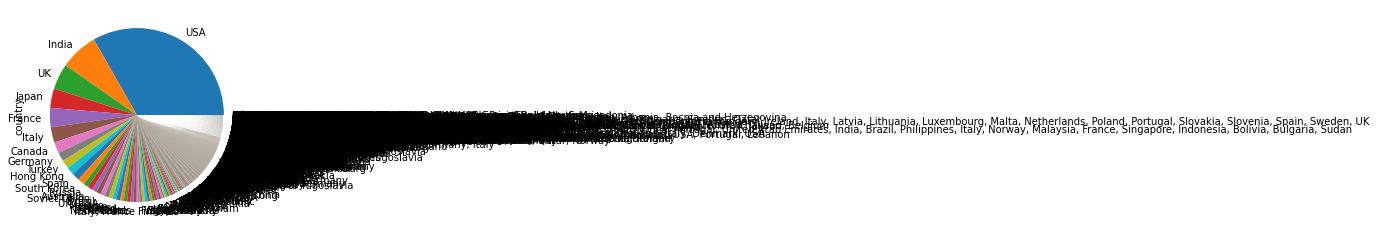

In [10]:
name_dynamics = df['country'].value_counts()
name_dynamics.plot(kind='pie', y='Count')

Как видно из круговой диаграммы, больше всего фильмов снимают в США, Индии и Англии

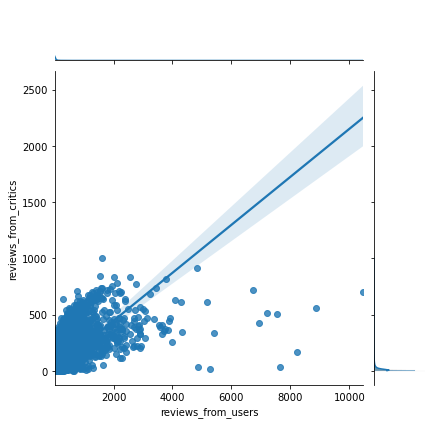

In [5]:
sns.jointplot(x='reviews_from_users', y='reviews_from_critics', 
              data=df, kind='reg')

Как видно кол-во отзывов пользователей и критиков не сильно разняться

## Boxplot

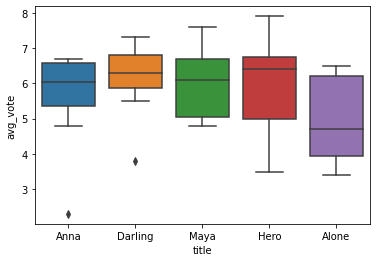

In [90]:
top_movie = df.title.value_counts().sort_values(ascending=False).head(5).index.values

ax = sns.boxplot(x="title", y="avg_vote", 
            data=df[df.title.isin(top_movie)])


На данном графике мы видим топ 5 популярных фильмов по средней оценке вышедших последними

## Heatmap

In [24]:
platform_genre_sales = df.pivot_table(
                        index='country', 
                        columns='avg_vote', 
                        values='duration', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

avg_vote,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.7,9.8,9.9
country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, France",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Afghanistan, France, Germany, UK",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Afghanistan, Iran",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Afghanistan, Ireland, Japan, Iran, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yugoslavia, USA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Yugoslavia, USA, Liechtenstein",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Yugoslavia, West Germany",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


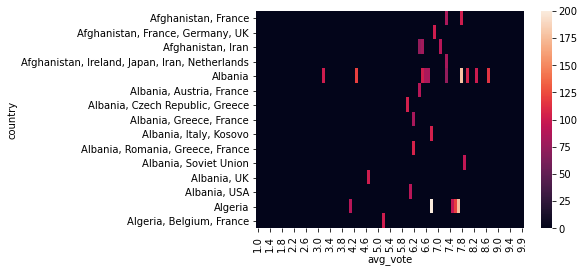

In [27]:
ax = sns.heatmap(platform_genre_sales.head(15))

## Scatter plot matrix

In [84]:
data= df.groupby('title')[['duration','avg_vote', 'reviews_from_users','reviews_from_critics']].mean()\
     .sort_values('avg_vote', ascending=False)

In [85]:
data.head()

,duration,avg_vote,reviews_from_users,reviews_from_critics
title,,,,
Suvarna Sundari,120.0,9.9,NaN,2.0
Lejos de Casa pelicula Venezolana,87.0,9.8,NaN,NaN
Jeeudo,150.0,9.8,114.0,NaN
Notuku Potu,121.0,9.8,2.0,1.0
Ek,129.0,9.8,NaN,NaN


array([[<AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='avg_vote', ylabel='duration'>,
        <AxesSubplot:xlabel='reviews_from_users', ylabel='duration'>,
        <AxesSubplot:xlabel='reviews_from_critics', ylabel='duration'>],
       [<AxesSubplot:xlabel='duration', ylabel='avg_vote'>,
        <AxesSubplot:xlabel='avg_vote', ylabel='avg_vote'>,
        <AxesSubplot:xlabel='reviews_from_users', ylabel='avg_vote'>,
        <AxesSubplot:xlabel='reviews_from_critics', ylabel='avg_vote'>],
       [<AxesSubplot:xlabel='duration', ylabel='reviews_from_users'>,
        <AxesSubplot:xlabel='avg_vote', ylabel='reviews_from_users'>,
        <AxesSubplot:xlabel='reviews_from_users', ylabel='reviews_from_users'>,
        <AxesSubplot:xlabel='reviews_from_critics', ylabel='reviews_from_users'>],
       [<AxesSubplot:xlabel='duration', ylabel='reviews_from_critics'>,
        <AxesSubplot:xlabel='avg_vote', ylabel='reviews_from_critics'>,
        <AxesSubplot:xlabel

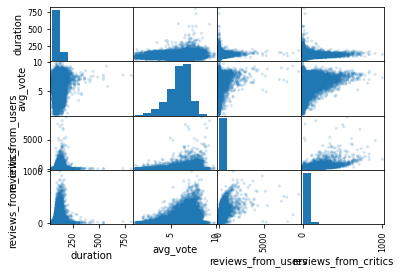

In [86]:
pd.plotting.scatter_matrix(data, alpha=0.2)

**При работе с большим кол-вом данных удобнее использовать pairplot, графики получаеются симпатичнее и данные лучше видно**

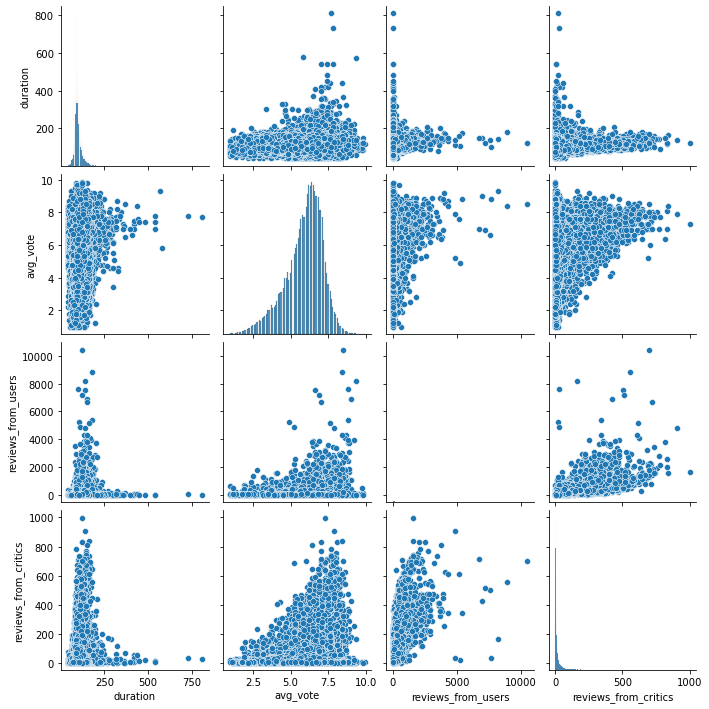

In [87]:
sns_plot = sns.pairplot(
    df[['duration','avg_vote', 'reviews_from_users','reviews_from_critics']])
sns_plot

Фильмы со средней длительностью больше просматривают, на них больше оценок и рейтинг выше